<div align="center">

### CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING ALGORITHMS

</div>


<div align="center">

### IMPORTING THE LIBRARIES

</div>


In [270]:

# Numerical operations and data manipulation
import numpy as np
import pandas as pd

# Machine learning and deep learning frameworks
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import KFold, StratifiedKFold

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction techniques
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and evaluation
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report)
from imblearn.metrics import classification_report_imbalanced

# For managing warnings
import warnings
warnings.filterwarnings("ignore")

# Additional utilities
import matplotlib.patches as mpatches
import time
from collections import Counter, defaultdict
import collections


<div align="center">

### LOADING THE DATASET

</div>


In [272]:
df = pd.read_csv('creditcard.csv')

<div align="center">

### DISPLAYING THE FIRST FEW ROWS OF OUR DATASET

</div>


In [274]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<div align="center">

### SHAPE OF DATASET

</div>


In [276]:
df.shape

(284807, 31)

<div align="center">

### STATISTICAL INFERENCE FROM THE DATA

</div>


In [278]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [279]:
#checking for null values in the data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [280]:
#columns in the dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<div align="center">

### Fraudulent and Non- Fraudulent Transation

</div>


In [282]:
#checking the proportion of fraudulent and non-fraudulent transactions
print('No-Frauds:', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of dataset')
print('Frauds:   ', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of dataset')

No-Frauds: 99.83 % of dataset
Frauds:    0.17 % of dataset


<div align="center">

### Plotting the imbalance in the dataset

</div>


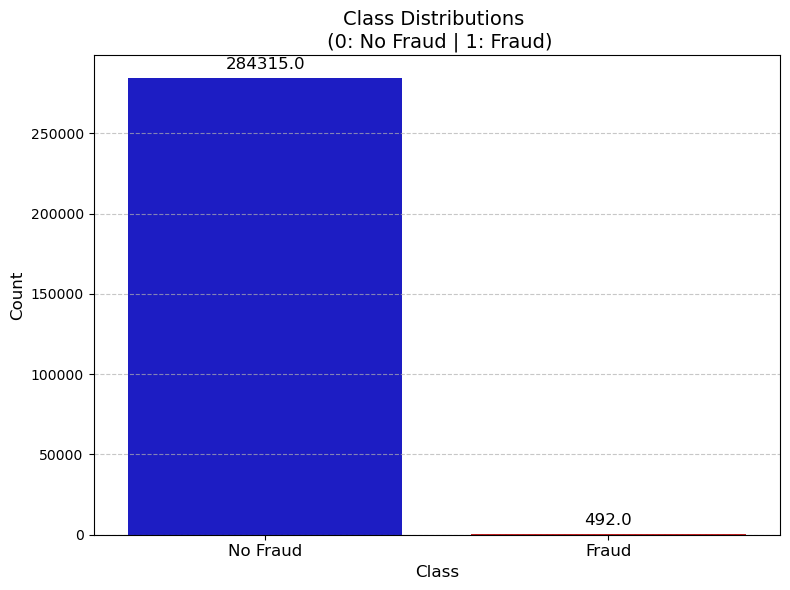

In [284]:
# Define colors for the plot
colors = ['#0101DF', '#DF0101']

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df, palette=colors)

# Add title and labels
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with class counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Improve aesthetics
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<div align="center">

### Distribution of Transaction Amount and Time

</div>


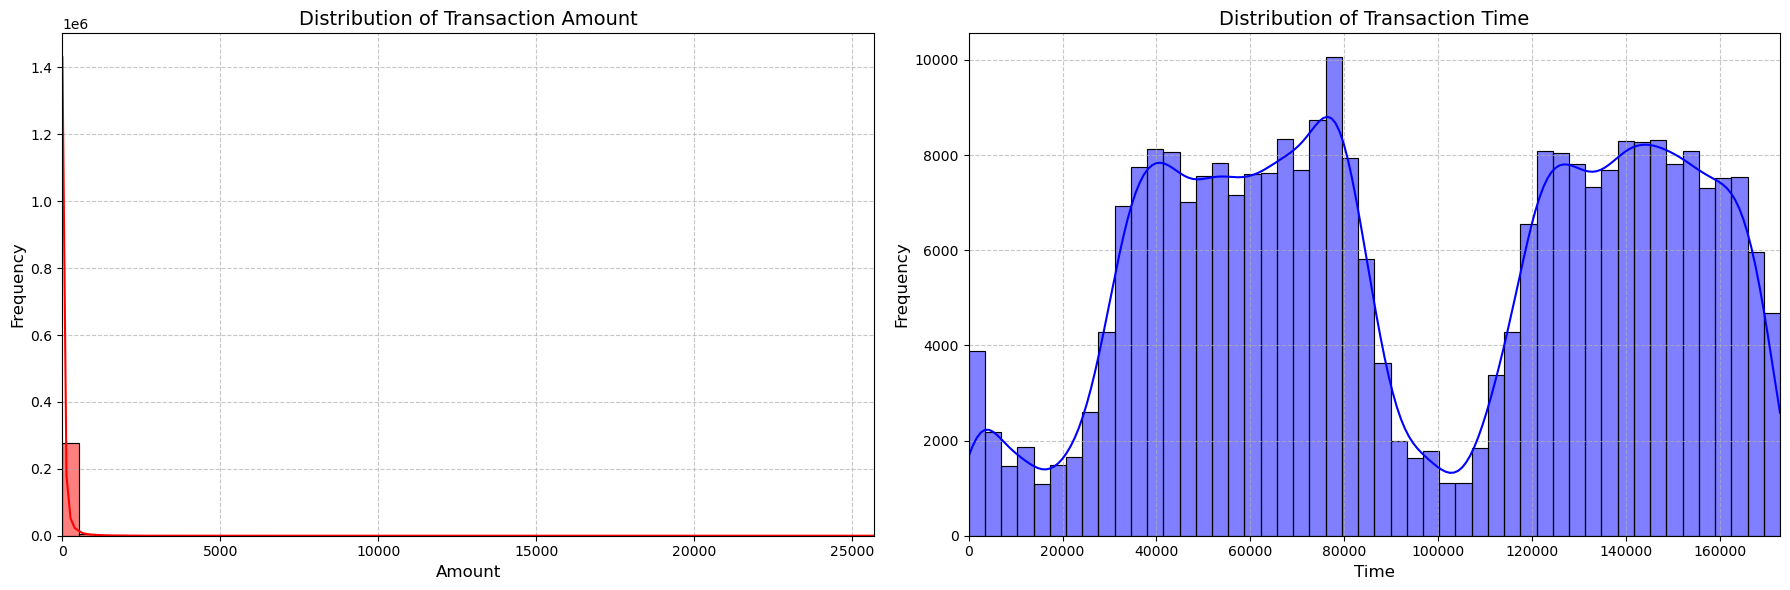

In [286]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Define the data
amount_val = df["Amount"].values
time_val = df["Time"].values

# Plot the distribution of Transaction Amount
sns.histplot(amount_val, ax=ax[0], color='red', kde=True, bins=50)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlabel('Amount', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].grid(True, linestyle='--', alpha=0.7)

# Plot the distribution of Transaction Time
sns.histplot(time_val, ax=ax[1], color='blue', kde=True, bins=50)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlabel('Time', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()
plt.show()

<div align="center">

### Feature Scaling on Amount and Time

</div>


In [288]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [289]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are scaled!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


<div align="center">

### Stratified K-Fold Cross-Validation and Label Distribution Analysis

</div>


In [291]:
#Splitting Features and Target Variable:
X = df.drop('Class', axis =1)
y = df["Class"]

#Setting Up Stratified K-Fold:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle = False)

for train_index, test_index in sss.split(X,y):
    print('Train:', train_index, 'Test:', test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 108)
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
------------------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


<div align="center">

### Balanced Dataset

</div>


In [293]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]
# Combined the subsets to create a balanced dataset with equal numbers of fraudulent and non-fraudulent transactions
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffled the balanced dataset to ensure random distribution
new_df = normal_distributed_df.sample(frac=1, random_state =42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
243249,9.378886,0.789037,0.695087,-2.570941,-1.623645,0.686052,-0.967187,-0.129365,0.515870,-0.175081,...,1.184244,0.411233,-0.272745,-0.436602,-0.434089,-0.527159,0.477314,-0.193508,0.047603,0
6899,-0.293440,-0.890682,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1
44800,-0.167819,-0.500535,1.093739,-0.118997,1.381952,1.282954,-1.079237,-0.013272,-0.695567,0.255617,...,-0.165401,-0.003346,0.130796,0.014268,0.517773,0.337697,-0.436904,0.065168,0.028988,0
235634,-0.296793,0.749351,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,...,0.452241,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,1
50211,-0.293440,-0.473443,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,...,-0.346456,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1


<div align="center">

### Class distribution in the balanced subsample dataset

</div>


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


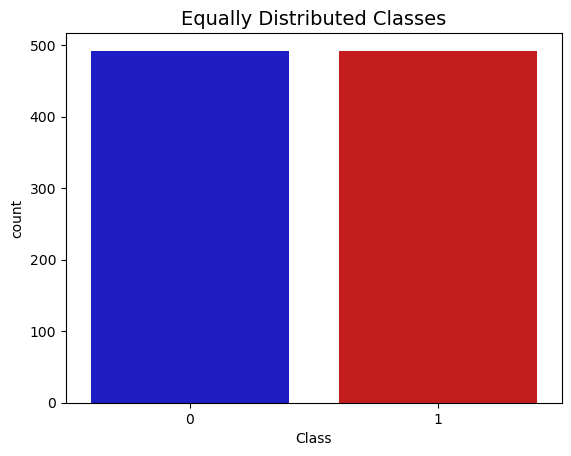

In [295]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x = 'Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

<div align="center">

### Correlation matrices of the original imbalanced dataset and the balanced subsample

</div>


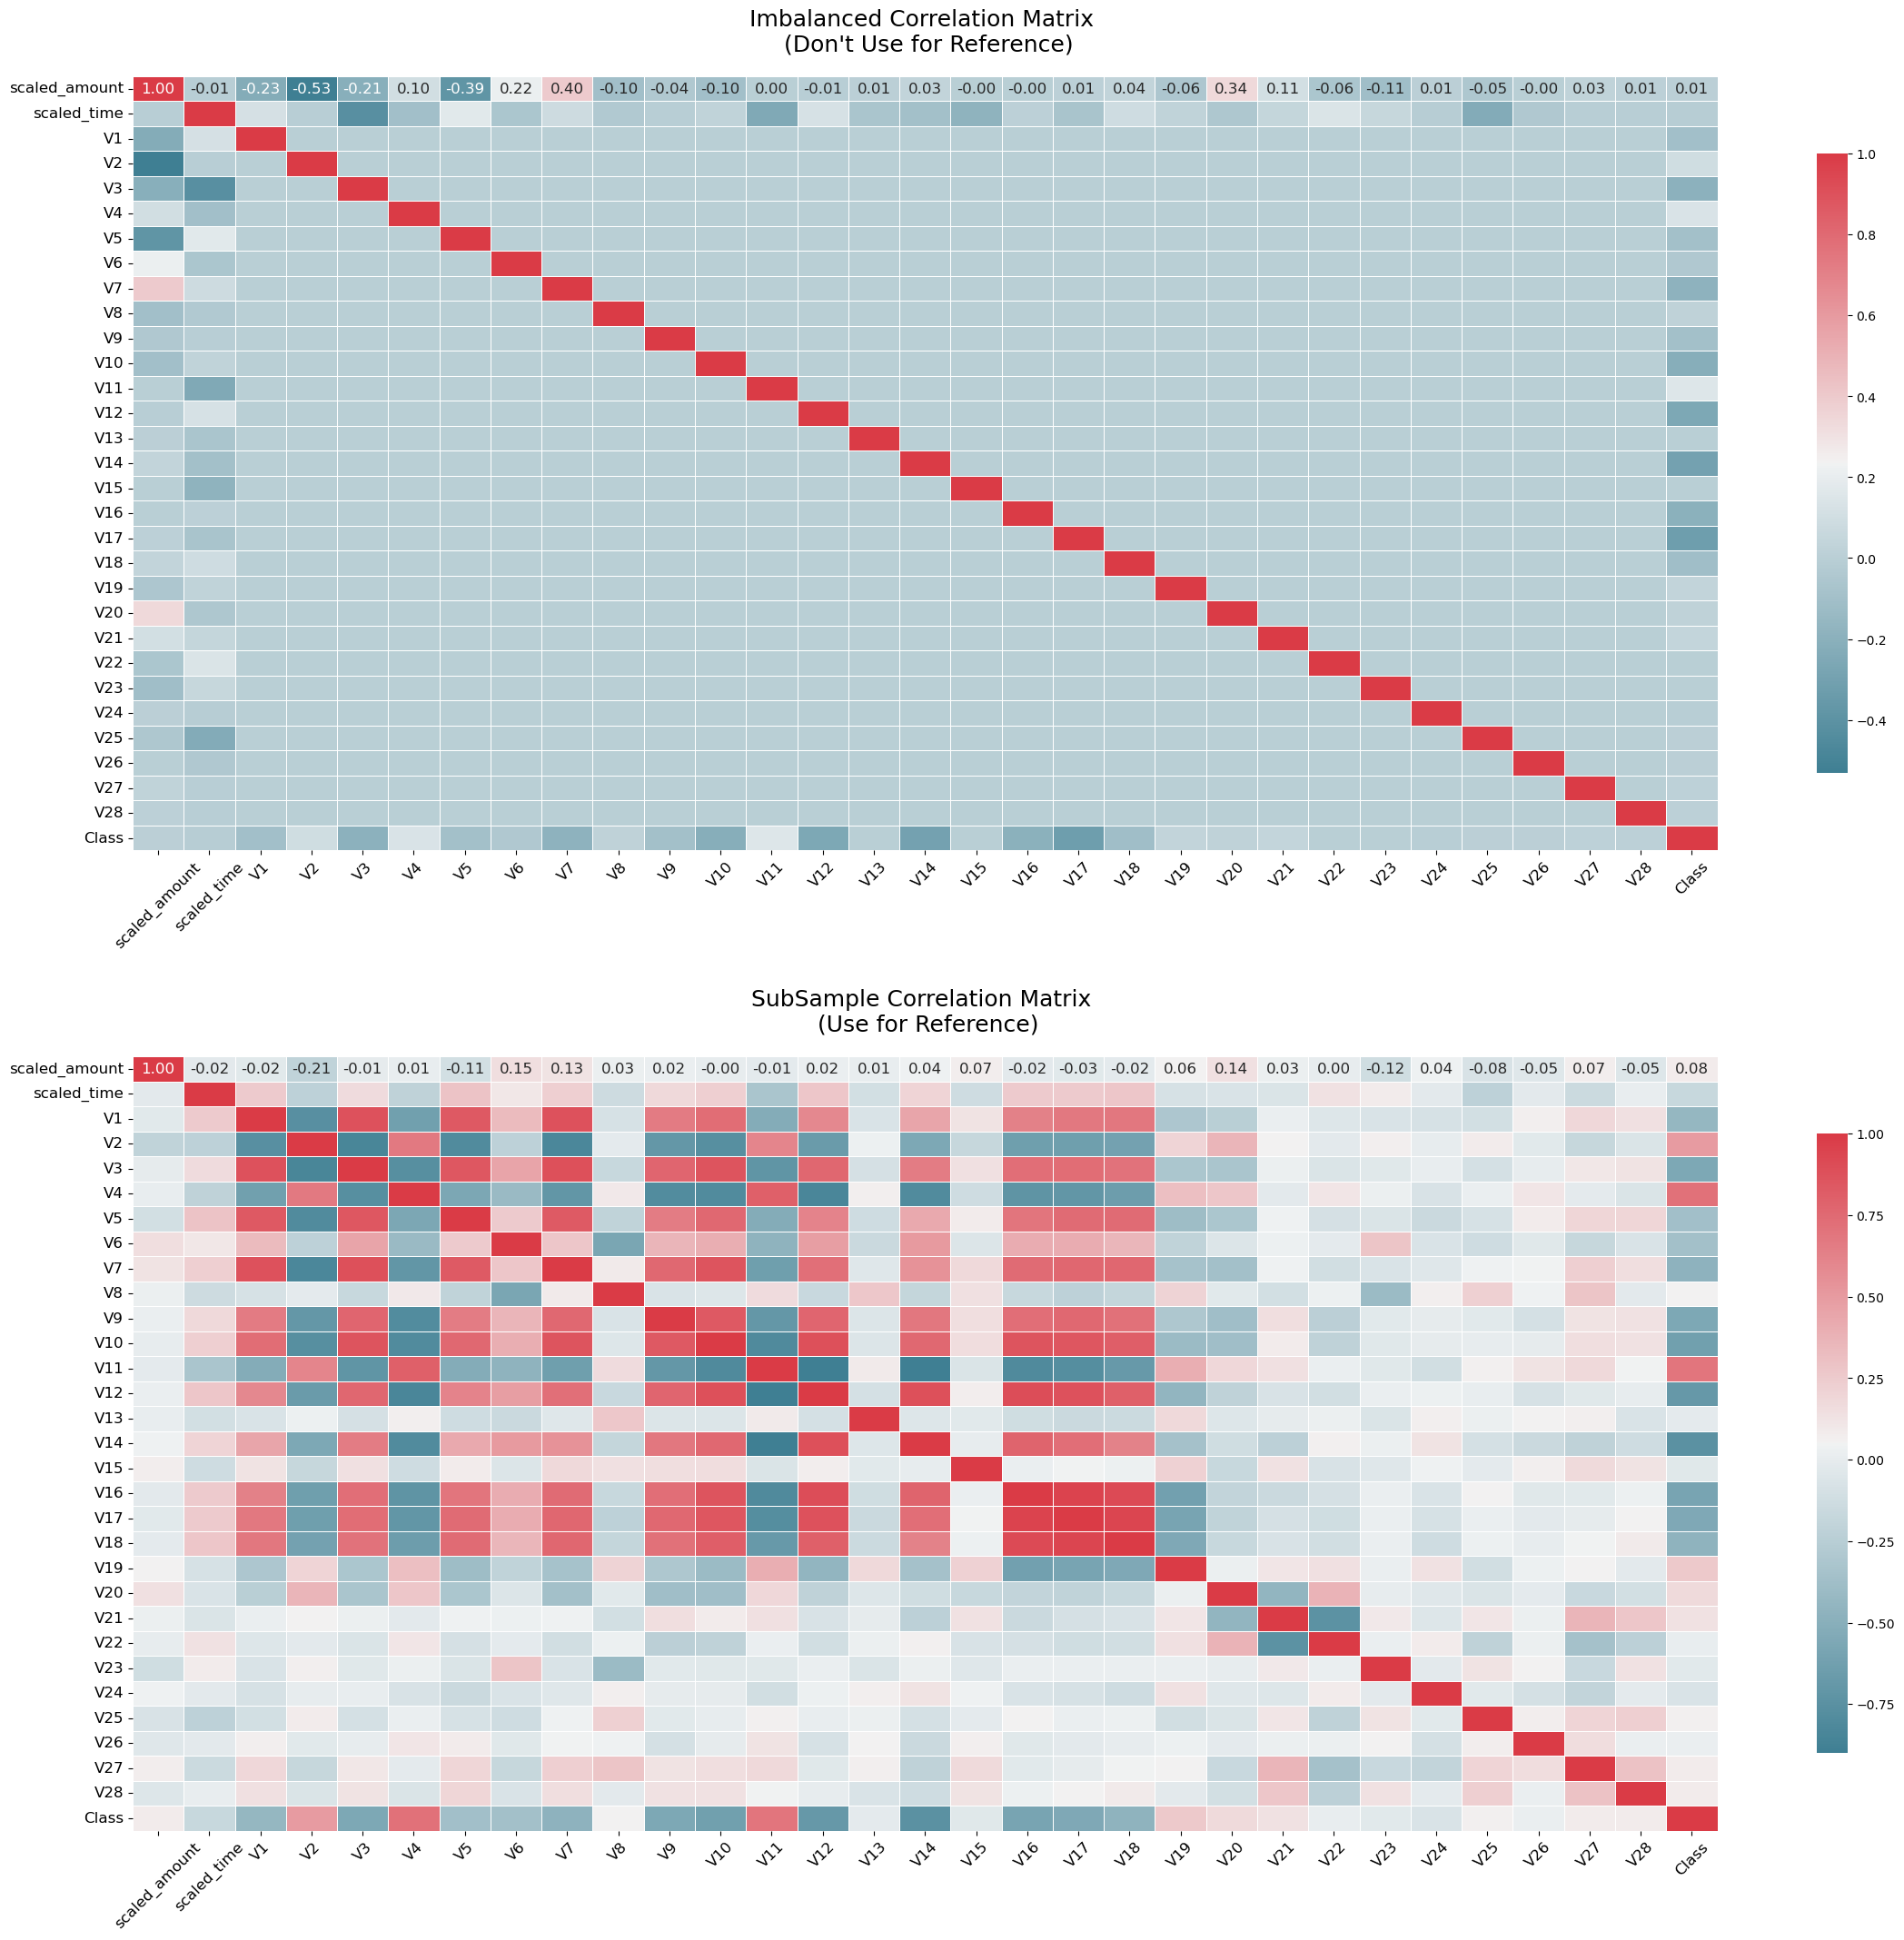

In [297]:
# Ensure that the correlation analysis is performed on the balanced subsample

# Create a figure with two subplots, arranged vertically
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 22))

# Set a more distinct color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Correlation Matrix for the Entire DataFrame (Imbalanced)
corr = df.corr()
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, 
            annot_kws={'size': 12}, cbar_kws={"shrink": .8}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (Don't Use for Reference)", fontsize=18, pad=20)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# Correlation Matrix for the Subsample (Balanced)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, 
            annot_kws={'size': 12}, cbar_kws={"shrink": .8}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (Use for Reference)', fontsize=18, pad=20)
ax2.tick_params(axis='x', rotation=45, labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Adjust the layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()


<div align="center">

### Visualizing Negative Correlations Between Features and Fraudulent Transactions Using Boxplots

</div>


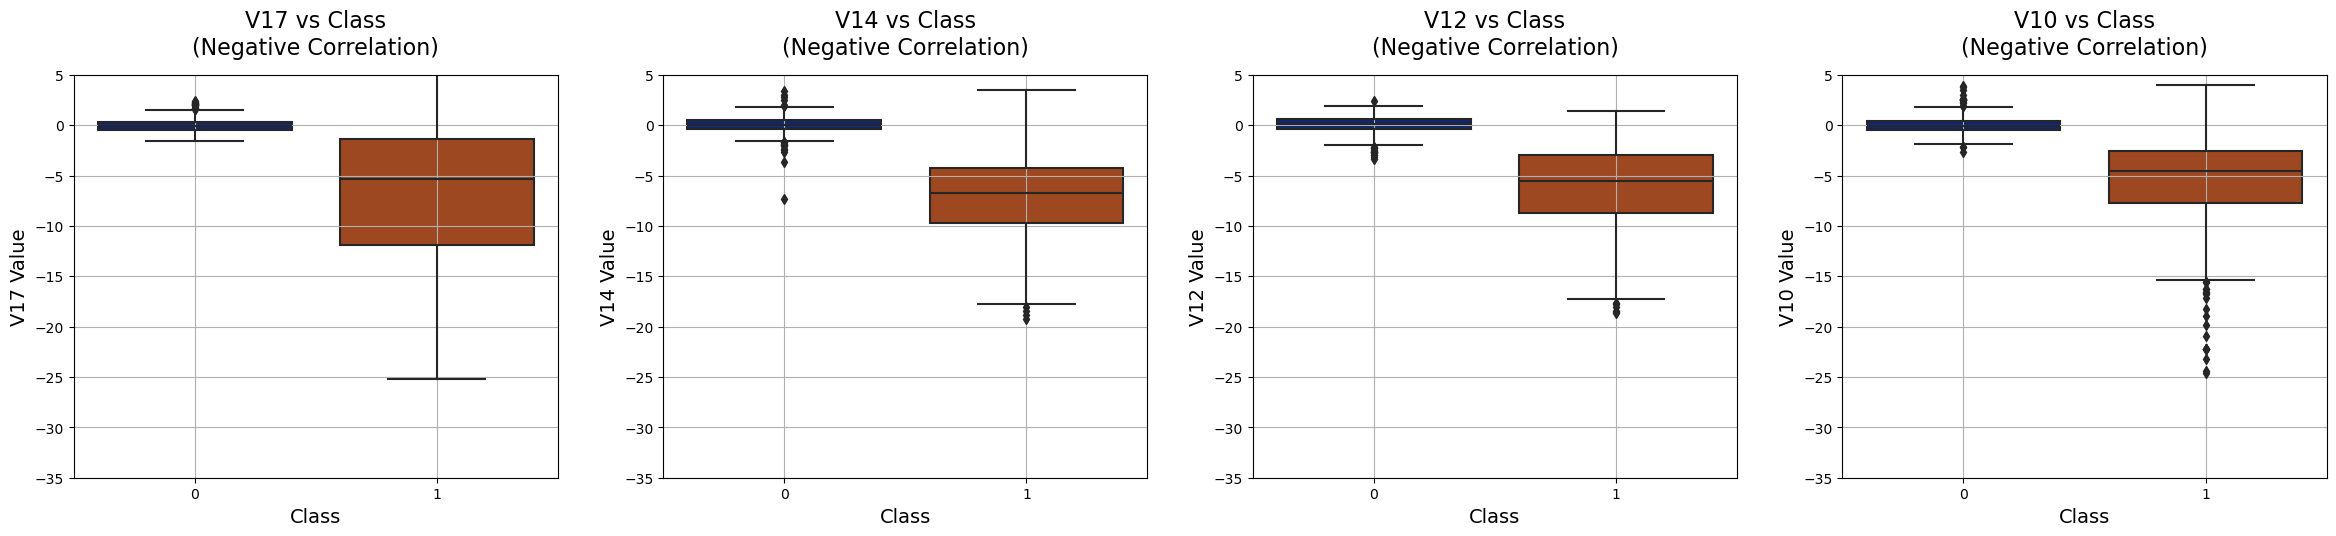

In [299]:
# Import a darker color palette
dark_colors = sns.color_palette("dark", n_colors=2)

# Create a figure with four subplots arranged horizontally
f, axes = plt.subplots(ncols=4, figsize=(24, 6))

# Define a consistent y-axis limit for all plots for better comparison
y_limit = (-35, 5)

# Boxplot for V17 vs Class
sns.boxplot(x="Class", y="V17", data=new_df, palette=dark_colors, ax=axes[0])
axes[0].set_title('V17 vs Class\n(Negative Correlation)', fontsize=16, pad=15)
axes[0].set_ylim(y_limit)
axes[0].set_xlabel("Class", fontsize=14)
axes[0].set_ylabel("V17 Value", fontsize=14)
axes[0].grid(True)

# Boxplot for V14 vs Class
sns.boxplot(x="Class", y="V14", data=new_df, palette=dark_colors, ax=axes[1])
axes[1].set_title('V14 vs Class\n(Negative Correlation)', fontsize=16, pad=15)
axes[1].set_ylim(y_limit)
axes[1].set_xlabel("Class", fontsize=14)
axes[1].set_ylabel("V14 Value", fontsize=14)
axes[1].grid(True)

# Boxplot for V12 vs Class
sns.boxplot(x="Class", y="V12", data=new_df, palette=dark_colors, ax=axes[2])
axes[2].set_title('V12 vs Class\n(Negative Correlation)', fontsize=16, pad=15)
axes[2].set_ylim(y_limit)
axes[2].set_xlabel("Class", fontsize=14)
axes[2].set_ylabel("V12 Value", fontsize=14)
axes[2].grid(True)

# Boxplot for V10 vs Class
sns.boxplot(x="Class", y="V10", data=new_df, palette=dark_colors, ax=axes[3])
axes[3].set_title('V10 vs Class\n(Negative Correlation)', fontsize=16, pad=15)
axes[3].set_ylim(y_limit)
axes[3].set_xlabel("Class", fontsize=14)
axes[3].set_ylabel("V10 Value", fontsize=14)
axes[3].grid(True)

# Adjust the layout to avoid overlapping elements
plt.tight_layout(pad=3.0)
plt.show()


<div align="center">

### Visualizing Positive Correlations Between Features and Fraudulent Transactions Using Boxplots

</div>


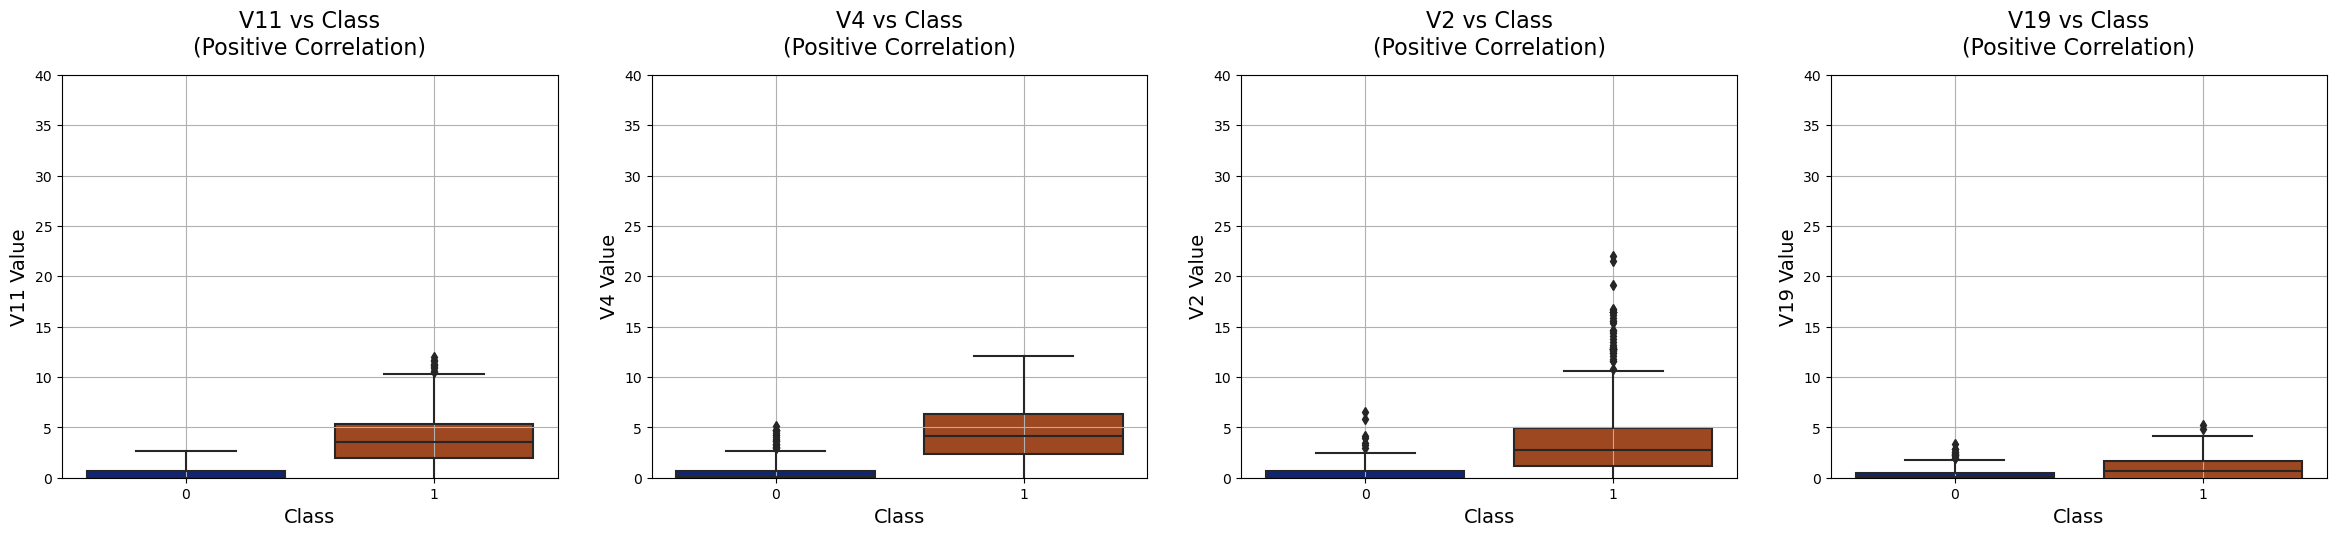

In [301]:
# Define a color palette for consistency
colors = sns.color_palette("dark", n_colors=2)

# Create a figure with four subplots arranged horizontally
f, axes = plt.subplots(ncols=4, figsize=(24, 6))

# Define a consistent y-axis limit for all plots if needed
# (You may adjust the y_limit based on your data range)
y_limit = (0, 40)

# Boxplot for V11 vs Class
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class\n(Positive Correlation)', fontsize=16, pad=15)
axes[0].set_ylim(y_limit)
axes[0].set_xlabel("Class", fontsize=14)
axes[0].set_ylabel("V11 Value", fontsize=14)
axes[0].grid(True)

# Boxplot for V4 vs Class
sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class\n(Positive Correlation)', fontsize=16, pad=15)
axes[1].set_ylim(y_limit)
axes[1].set_xlabel("Class", fontsize=14)
axes[1].set_ylabel("V4 Value", fontsize=14)
axes[1].grid(True)

# Boxplot for V2 vs Class
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class\n(Positive Correlation)', fontsize=16, pad=15)
axes[2].set_ylim(y_limit)
axes[2].set_xlabel("Class", fontsize=14)
axes[2].set_ylabel("V2 Value", fontsize=14)
axes[2].grid(True)

# Boxplot for V19 vs Class
sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class\n(Positive Correlation)', fontsize=16, pad=15)
axes[3].set_ylim(y_limit)
axes[3].set_xlabel("Class", fontsize=14)
axes[3].set_ylabel("V19 Value", fontsize=14)
axes[3].grid(True)

# Adjust the layout to avoid overlapping elements
plt.tight_layout(pad=3.0)
plt.show()


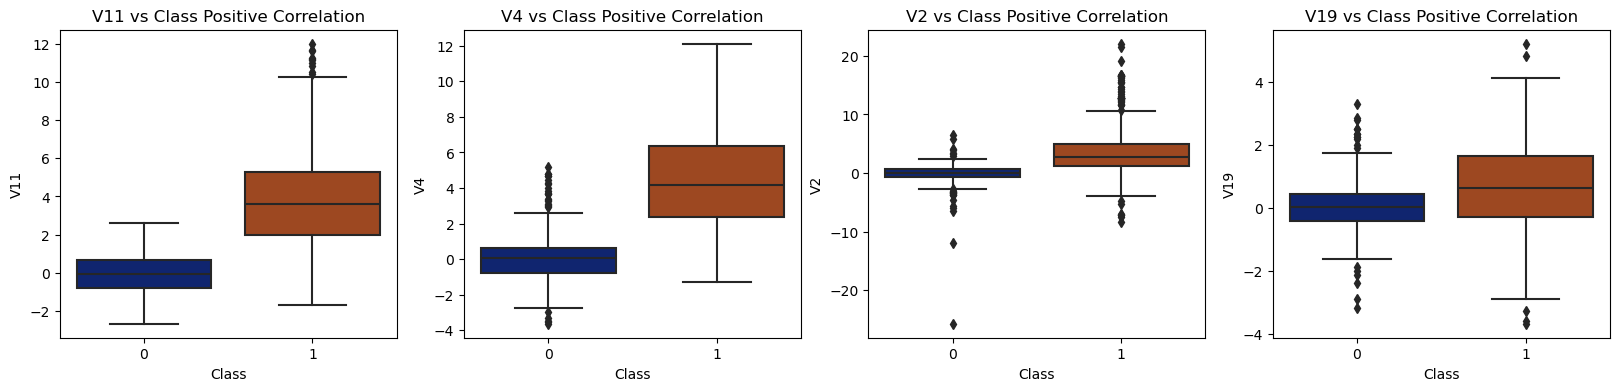

In [302]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

<div align="center">

### Distribution of Selected Features for Fraudulent Transactions with Normal Fit

</div>


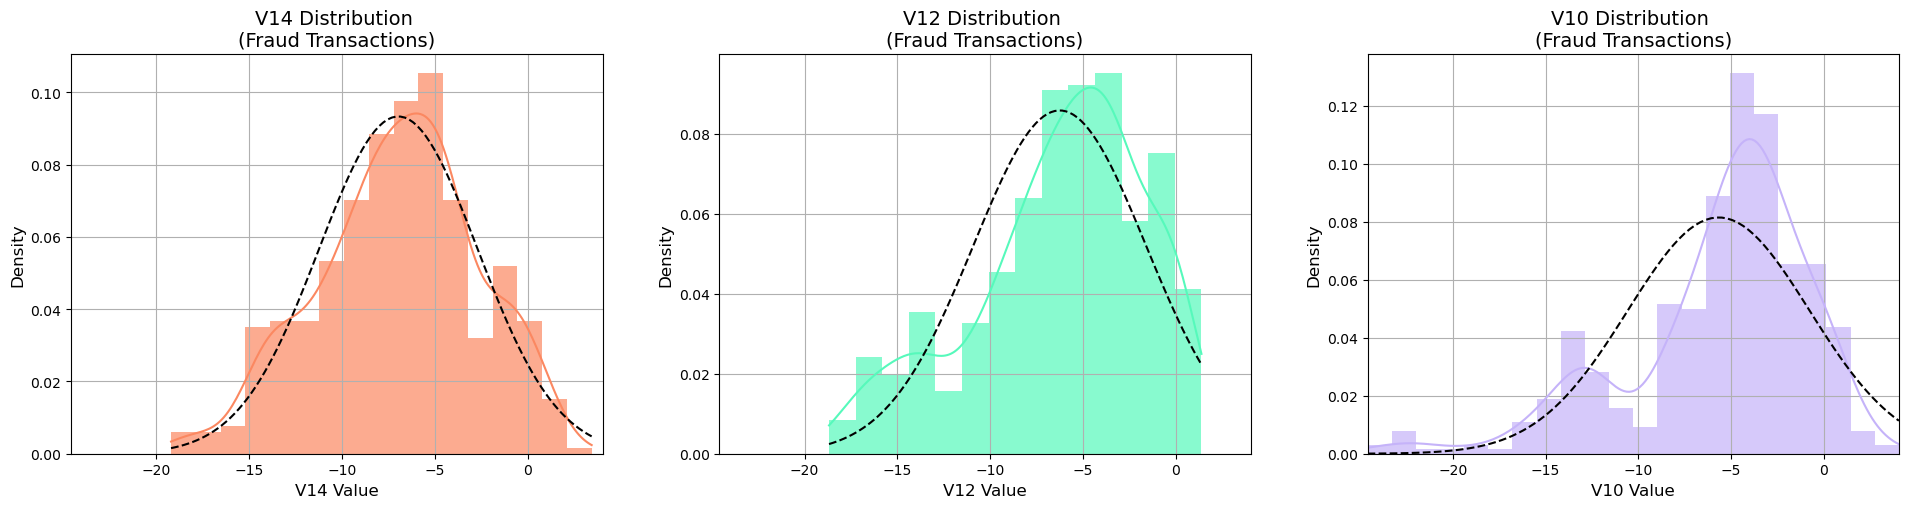

In [304]:
from scipy.stats import norm

# Create a figure with three subplots arranged horizontally
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Define a color palette for consistency
colors = ['#FB8861', '#56F9BB', '#C5B3F9']

# Define consistent x-axis limits if needed
x_limits = (new_df[['V14', 'V12', 'V10']].min().min(), new_df[['V14', 'V12', 'V10']].max().max())

# Plot distribution for V14
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color=colors[0], stat="density", linewidth=0, alpha=0.7)
sns.lineplot(x=np.linspace(v14_fraud_dist.min(), v14_fraud_dist.max(), 100), 
             y=norm.pdf(np.linspace(v14_fraud_dist.min(), v14_fraud_dist.max(), 100), 
                        np.mean(v14_fraud_dist), np.std(v14_fraud_dist)), 
             ax=ax1, color='black', linestyle='--')
ax1.set_title('V14 Distribution \n(Fraud Transactions)', fontsize=14)
ax1.set_xlim(x_limits)
ax1.set_xlabel('V14 Value', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.grid(True)

# Plot distribution for V12
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, color=colors[1], stat="density", linewidth=0, alpha=0.7)
sns.lineplot(x=np.linspace(v12_fraud_dist.min(), v12_fraud_dist.max(), 100), 
             y=norm.pdf(np.linspace(v12_fraud_dist.min(), v12_fraud_dist.max(), 100), 
                        np.mean(v12_fraud_dist), np.std(v12_fraud_dist)), 
             ax=ax2, color='black', linestyle='--')
ax2.set_title('V12 Distribution \n(Fraud Transactions)', fontsize=14)
ax2.set_xlim(x_limits)
ax2.set_xlabel('V12 Value', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.grid(True)

# Plot distribution for V10
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, color=colors[2], stat="density", linewidth=0, alpha=0.7)
sns.lineplot(x=np.linspace(v10_fraud_dist.min(), v10_fraud_dist.max(), 100), 
             y=norm.pdf(np.linspace(v10_fraud_dist.min(), v10_fraud_dist.max(), 100), 
                        np.mean(v10_fraud_dist), np.std(v10_fraud_dist)), 
             ax=ax3, color='black', linestyle='--')
ax3.set_title('V10 Distribution \n(Fraud Transactions)', fontsize=14)
ax3.set_xlim(x_limits)
ax3.set_xlabel('V10 Value', fontsize=12)
ax3.set_ylabel('Density', fontsize=12)
ax3.grid(True)

# Adjust layout to avoid overlapping elements
plt.tight_layout(pad=4.0)
plt.show()


<div align="center">

### Outlier Detection and Removal for Features V14, V12, and V10 in Fraud Transactions

</div>


In [306]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -18.0499976898594, -18.8220867423816, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.6837146333443, -18.4311310279993, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.7460441053944, -16.601196

<div align="center">

### Boxplots after removing outliers

</div>


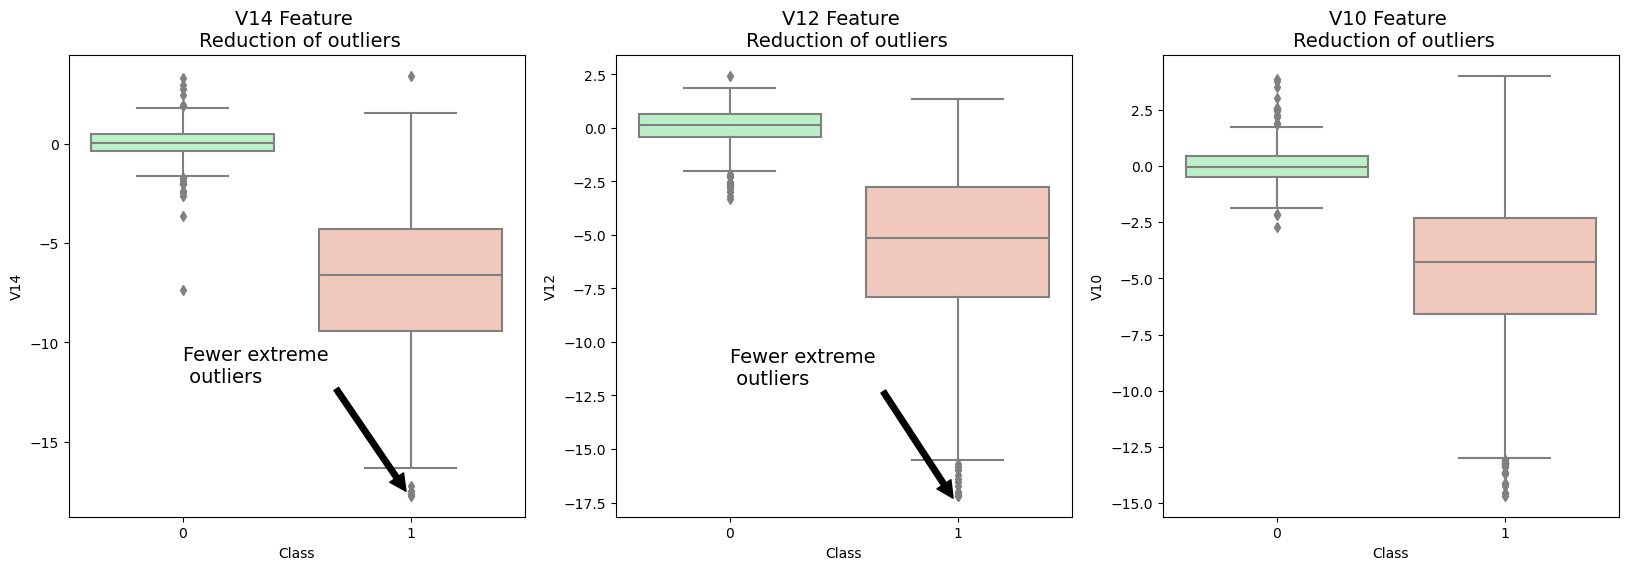

In [308]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

<div align="center">

### Dimensionality Reduction: Performance Comparison of T-SNE, PCA, and Truncated SVD

</div>


In [310]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 6.4 s
PCA took 0.039 s
Truncated SVD took 0.004 s


<div align="center">

### Comparison of Dimensionality Reduction Techniques

</div>


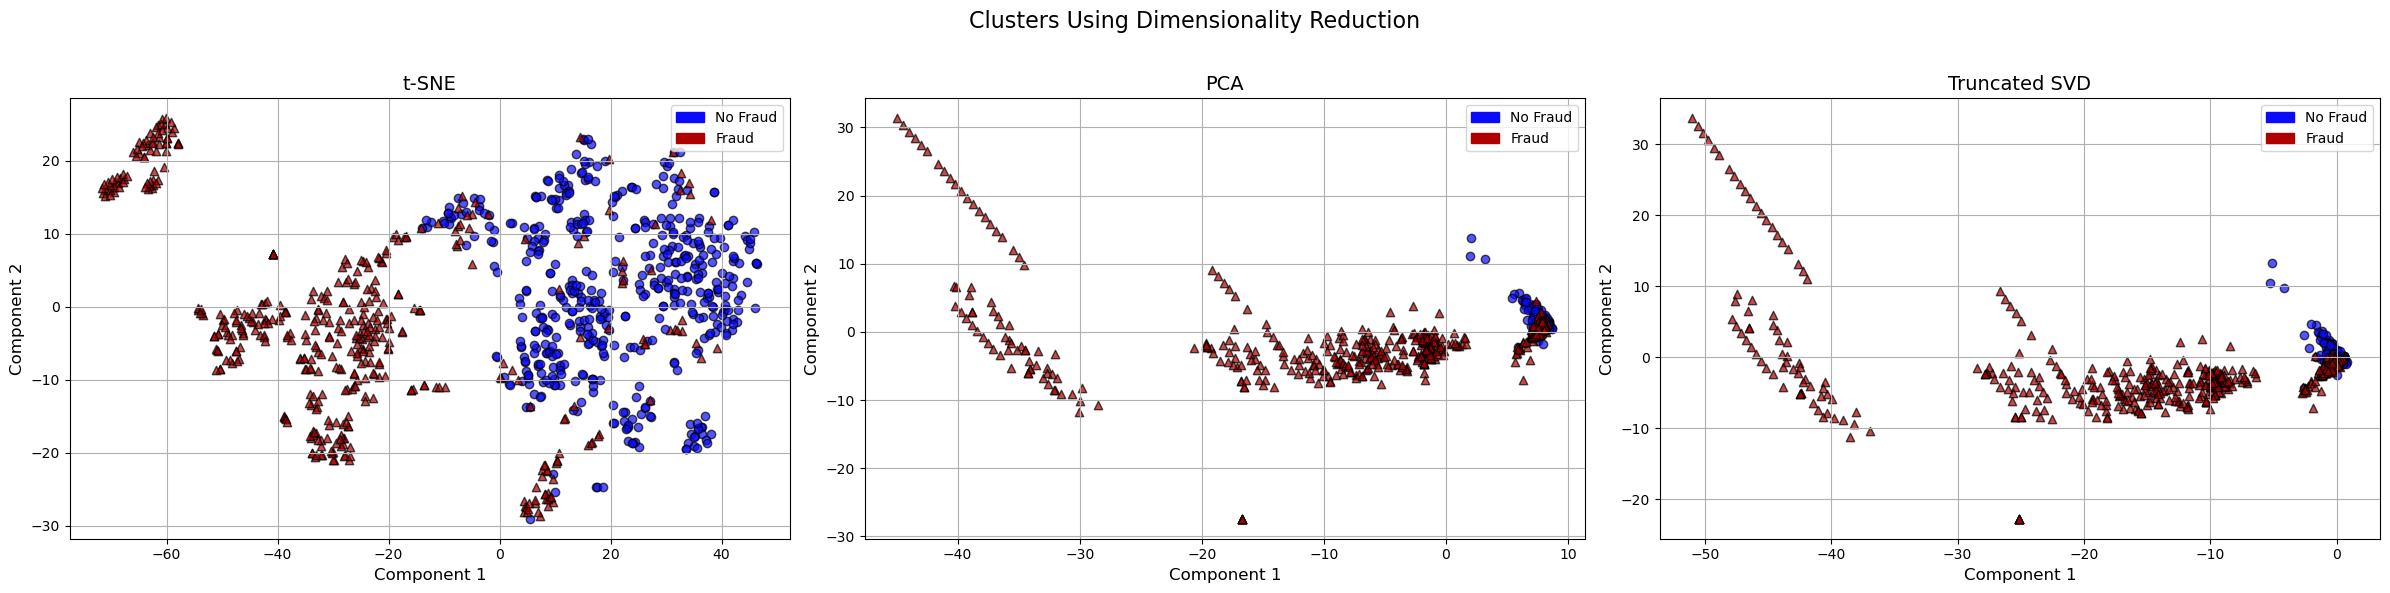

In [312]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters Using Dimensionality Reduction', fontsize=16)

# Color patches for the legend
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
scatter_tsne_no_fraud = ax1.scatter(X_reduced_tsne[y == 0, 0], X_reduced_tsne[y == 0, 1], 
                                    c='#0A0AFF', marker='o', label='No Fraud', edgecolor='k', alpha=0.7)
scatter_tsne_fraud = ax1.scatter(X_reduced_tsne[y == 1, 0], X_reduced_tsne[y == 1, 1], 
                                 c='#AF0000', marker='^', label='Fraud', edgecolor='k', alpha=0.7)
ax1.set_title('t-SNE', fontsize=14)
ax1.set_xlabel('Component 1', fontsize=12)
ax1.set_ylabel('Component 2', fontsize=12)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
scatter_pca_no_fraud = ax2.scatter(X_reduced_pca[y == 0, 0], X_reduced_pca[y == 0, 1], 
                                    c='#0A0AFF', marker='o', label='No Fraud', edgecolor='k', alpha=0.7)
scatter_pca_fraud = ax2.scatter(X_reduced_pca[y == 1, 0], X_reduced_pca[y == 1, 1], 
                                 c='#AF0000', marker='^', label='Fraud', edgecolor='k', alpha=0.7)
ax2.set_title('PCA', fontsize=14)
ax2.set_xlabel('Component 1', fontsize=12)
ax2.set_ylabel('Component 2', fontsize=12)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
scatter_svd_no_fraud = ax3.scatter(X_reduced_svd[y == 0, 0], X_reduced_svd[y == 0, 1], 
                                    c='#0A0AFF', marker='o', label='No Fraud', edgecolor='k', alpha=0.7)
scatter_svd_fraud = ax3.scatter(X_reduced_svd[y == 1, 0], X_reduced_svd[y == 1, 1], 
                                 c='#AF0000', marker='^', label='Fraud', edgecolor='k', alpha=0.7)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.set_xlabel('Component 1', fontsize=12)
ax3.set_ylabel('Component 2', fontsize=12)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
plt.show()


In [313]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [315]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [316]:

from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "Has a Accuracy of", round(training_score.mean(), 2) * 100, "%" )

Classifiers:  LogisticRegression Has a Accuracy of 93.0 %
Classifiers:  KNeighborsClassifier Has a Accuracy of 94.0 %
Classifiers:  SVC Has a Accuracy of 93.0 %
Classifiers:  DecisionTreeClassifier Has a Accuracy of 91.0 %


<div align="center">

### Hyperparameter Tuning for Classification Models Using GridSearchCV

</div>


In [318]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print("log_reg:", log_reg)

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print("knear:", knears_neighbors)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
print("svc:",svc)
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("tree: ",tree_clf)

log_reg: LogisticRegression(C=0.1)
knear: KNeighborsClassifier(n_neighbors=3)
svc: SVC(C=0.7, kernel='linear')
tree:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


<div align="center">

### Evaluating Model Performance with Cross-Validation to Detect Overfitting

</div>


In [320]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  93.54%
Knears Neighbors Cross Validation Score 93.15%
Support Vector Classifier Cross Validation Score 93.28%
DecisionTree Classifier Cross Validation Score 92.49%


<div align="center">

### Cross-Validation with NearMiss Undersampling Technique for Model Evaluation

</div>


In [322]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56962  56963  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56959 56960 56961]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56962  56963  56964 ... 114755 115525 115727]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113915 113916 113917 ... 179736 180141 181255]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170872 170873 170874 ... 228916 229567 229652]
Train: [     0      1      2 ... 228916 229567 229652] Test: [227840 227841 227842 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


<div align="center">

### Learning Curves for Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, and Decision Tree Classifier

</div>


In [324]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

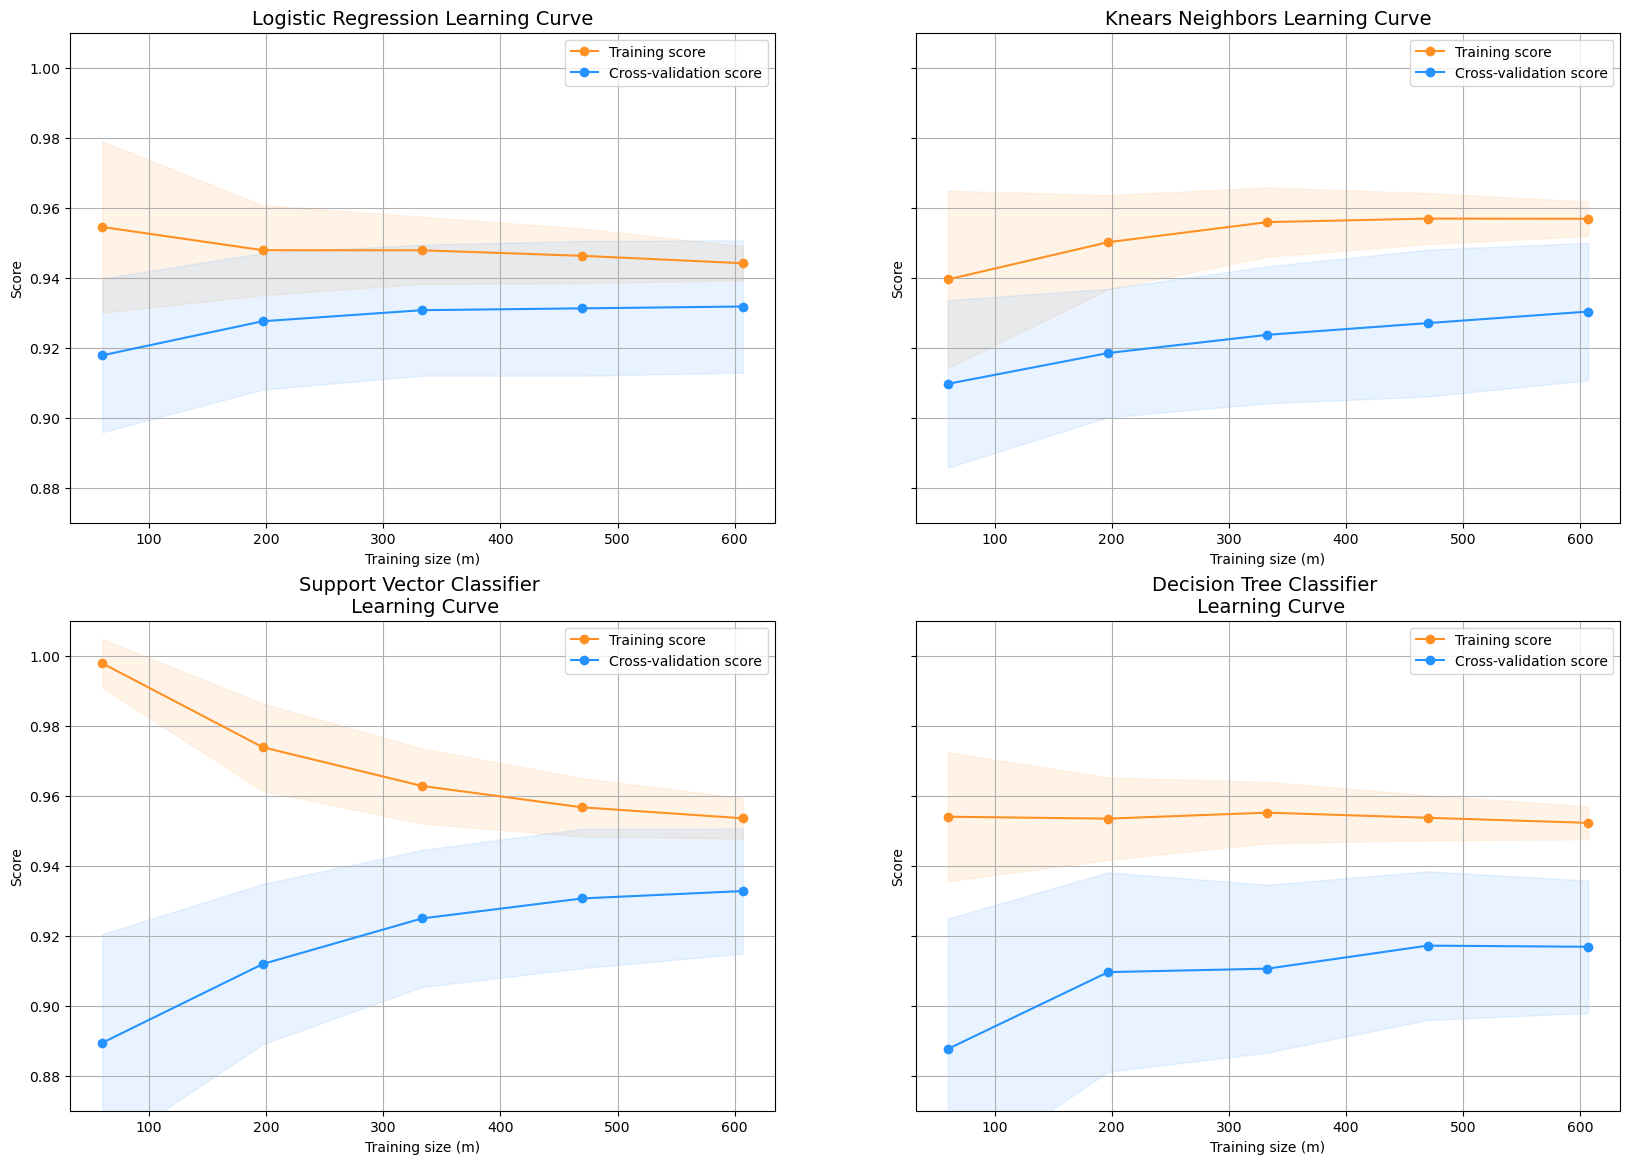

In [325]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

<div align="center">

### Generate Cross-Validated Predictions for ROC Curve Analysis of Various Classifiers

</div>


In [327]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [328]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [329]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9716901193237856
KNears Neighbors:  0.9309720929586465
Support Vector Classifier:  0.9692453013654864
Decision Tree Classifier:  0.9246308463793079


<div align="center">

### ROC Curve Comparison of Top 4 Classifiers

</div>


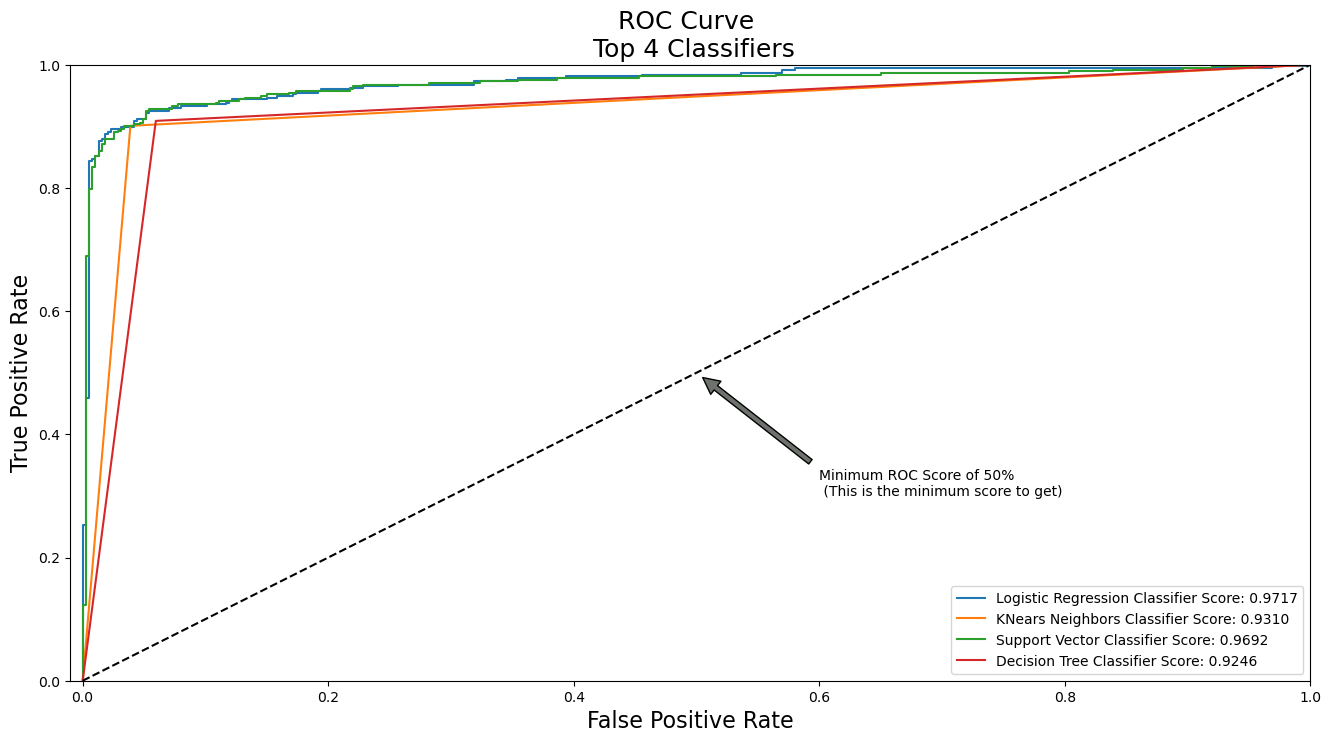

In [331]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

<div align="center">

### Plotting the ROC Curve for Logistic Regression

</div>


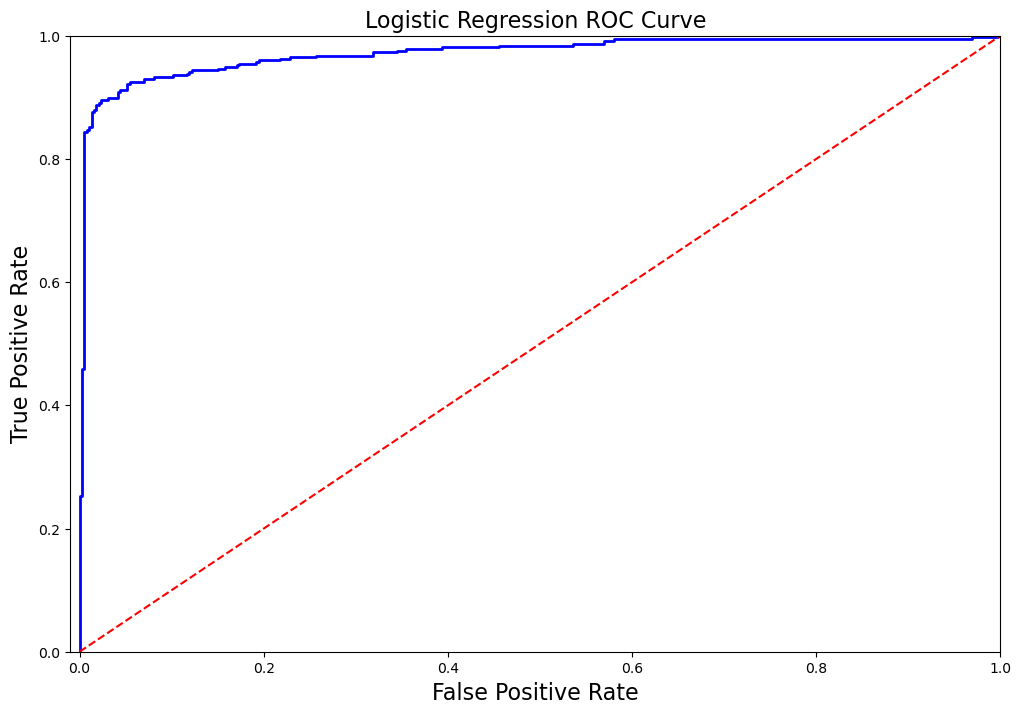

In [333]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

<div align="center">

### Evaluating Logistic Regression Performance: Overfitting vs. Undersampling Metrics

</div>


In [335]:

from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [336]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case- when we take 
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))

# How it should look like
print('---' * 42)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))

Overfitting: 

Recall Score: 0.89
Precision Score: 0.90
F1 Score: 0.89
Accuracy Score: 0.90
------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.83
Precision Score: 0.00
Recall Score: 0.14
F1 Score: 0.00
